<a href="https://colab.research.google.com/github/JuliaKovalchook/Python-Cheatsheet/blob/main/NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLTP
https://www.nltk.org/howto.html


In [32]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#Spliting

In [21]:
input1 = "List listed lists listing listings"
words1 = input1.lower().split(' ')
words1

['list', 'listed', 'lists', 'listing', 'listings']

## Tokenization
Tokenization is the process splitting the raw text into small chunks of words or sentences, called tokens.

word_tokenize - split word

sent_tokenize - split sent

In [22]:
#nltk.download('punkt')

text11 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!"
text_split=text11.split(' ')
print(text_split)

text_word=nltk.word_tokenize(text11)
print(text_word)

text_sent=nltk.sent_tokenize(text11)
print(text_sent)

['This', 'is', 'the', 'first', 'sentence.', 'A', 'gallon', 'of', 'milk', 'in', 'the', 'U.S.', 'costs', '$2.99.', 'Is', 'this', 'the', 'third', 'sentence?', 'Yes,', 'it', 'is!']
['This', 'is', 'the', 'first', 'sentence', '.', 'A', 'gallon', 'of', 'milk', 'in', 'the', 'U.S.', 'costs', '$', '2.99', '.', 'Is', 'this', 'the', 'third', 'sentence', '?', 'Yes', ',', 'it', 'is', '!']
['This is the first sentence.', 'A gallon of milk in the U.S. costs $2.99.', 'Is this the third sentence?', 'Yes, it is!']


###Frequency

In [23]:
from nltk.probability import FreqDist

token_dict = FreqDist(text_word) #frequency distribution of all the words in the text
lst=token_dict.most_common(5)  #lst = {k: token_dict[k] for k in list(token_dict)[:5]} - the same
lst

[('the', 3), ('is', 2), ('sentence', 2), ('.', 2), ('This', 1)]

In [24]:
#find longest word
longest_word =  max(token_dict, key=len)
tuple_longest_word=(longest_word, len(longest_word))
print(tuple_longest_word)

#find frequency word
frequency_word=token_dict.most_common(1)
print(frequency_word[0])

('sentence', 8)
('the', 3)


##Stemming
stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form


In [25]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in words1]

['list', 'list', 'list', 'list', 'list']

##Lemmatization
Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form


Lemmatization is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster

In [26]:
#nltk.download('wordnet')

WNlemma = nltk.WordNetLemmatizer()
[WNlemma.lemmatize(t) for t in words1]

['list', 'listed', 'list', 'listing', 'listing']

#Tag

In [27]:
#nltk.download('averaged_perceptron_tagger')
print(text11, '\n')
text_word=nltk.word_tokenize(text11)
tag_text=nltk.pos_tag(text_word)
tag_text

This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is! 



[('This', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('sentence', 'NN'),
 ('.', '.'),
 ('A', 'DT'),
 ('gallon', 'NN'),
 ('of', 'IN'),
 ('milk', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('U.S.', 'NNP'),
 ('costs', 'VBZ'),
 ('$', '$'),
 ('2.99', 'CD'),
 ('.', '.'),
 ('Is', 'VBZ'),
 ('this', 'DT'),
 ('the', 'DT'),
 ('third', 'JJ'),
 ('sentence', 'NN'),
 ('?', '.'),
 ('Yes', 'UH'),
 (',', ','),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('!', '.')]

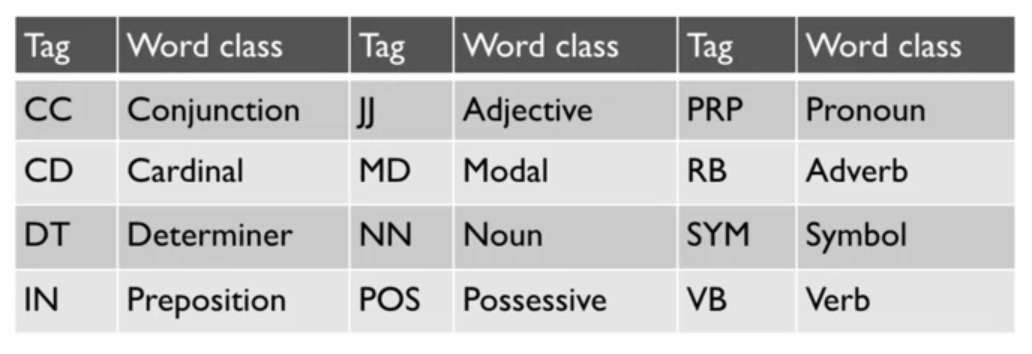


#Similarity



In [28]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn


#https://www.nltk.org/howto/wordnet.html


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
'''
pos - part of speech
ADJ, ADJ_SAT, ADV, NOUN, VERB = "a", "s", "r", "n", "v"


def convert_tag(tag):
    """Convert the tag given by nltk.pos_tag to the tag used by wordnet.synsets"""

    tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v'}
    try:
        return tag_dict[tag[0]]
    except KeyError:
        return None

tag_text=nltk.pos_tag(text_word)
pos_text=[(word[0], convert_tag(word[1]))  for word in  tag_text if convert_tag(word[1])
'''

print(wn.synset('dog.n.01')) #wn.synset('{lema}{pos}{number})
print(wn.synsets('dog'))


Synset('dog.n.01')
[Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]


In [30]:
'''similarity'''

#0- there is no similarity
#1 - the similarity exists


dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')

print(dog.path_similarity(dog)) # formula calculation 1/{number path}+1
print(dog.lch_similarity(cat))  #using LCH, longer calculation

#LCH-Lowest common hypernyms
print(dog.lowest_common_hypernyms(cat))


1.0
2.0281482472922856
[Synset('carnivore.n.01')]


In [31]:
import pandas as pd
#data
data_list=[['Ms Stewart, the chief executive, was not expected to attend.',
  'Ms Stewart, 61, its chief executive officer and chairwoman, did not attend.\n'],
 ["After more than two years' detention under the State Security Bureau, the four were found guilty of subversion in Beijing's No. 1 Intermediate Court last Wednesday.",
  'After more than two years in detention by the State Security Bureau, the four were found guilty last Wednesday of subversion.\n'],
 ['"It still remains to be seen whether the revenue recovery will be short- or long-lived," Sprayregen said.',
  '"It remains to be seen whether the revenue recovery will be short- or long-lived," said James Sprayregen, UAL bankruptcy attorney, in court.\n'],
 ['And it\'s going to be a wild ride," said Allan Hoffenblum, a Republican consultant.',
  'Now the rest is just mechanical," said Allan Hoffenblum, a Republican consultant.\n'],
 ["The cards are issued by Mexico's consulates to its citizens living abroad and show the date of birth, a current photograph and the address of the card holder.",
  "The card is issued by Mexico's consulates to its citizens living abroad and shows the date of birth, a current photograph and the address of the cardholder.\n"]]
df = pd.DataFrame(data_list, columns=['Doc1', 'Doc2'])

def convert_tag(tag):
    """Convert the tag given by nltk.pos_tag to the tag used by wordnet.synsets"""

    tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v'}
    try:
        return tag_dict[tag[0]]
    except KeyError:
        return None

def doc_to_synsets(doc):
    """
    Example:
        doc_to_synsets('Fish are friends.')
        Out: [Synset('fish.n.01'), Synset('be.v.01'), Synset('friend.n.01')]
    """

    text_word=nltk.word_tokenize(doc)
    tag_text=nltk.pos_tag(text_word)

    pos_text=[(word[0], convert_tag(word[1]))  for word in  tag_text]
    result= [(wn.synsets(i[0] , i[1] )[0]) for i in pos_text if i[0].isalpha()==True and len(wn.synsets(i[0] , i[1] ))!=0]
    return result

def similarity_score(synsets1, synsets2):
    """
    Example:
        synsets1 = doc_to_synsets('I like cats')
        synsets2 = doc_to_synsets('I like dogs')
        similarity_score(synsets1, synsets2)
        Out: 0.7333333333333333
    """

    list_max=[]
    for i1 in synsets1:
        list_s=[]
        for i2 in synsets2:
            ps=i1.path_similarity(i2)
            list_s.append(ps)

        list_max.append(max(list_s))
    return sum(list_max)/len(list_max)

def document_path_similarity(doc1, doc2):
    """Finds the symmetrical similarity between doc1 and doc2"""
    synsets1 = doc_to_synsets(doc1)
    synsets2 = doc_to_synsets(doc2)
    return (similarity_score(synsets1, synsets2) + similarity_score(synsets2, synsets1)) / 2

def return_df_similarity(df):
    from sklearn.metrics import accuracy_score
    df['similarity_score']=df.apply(lambda x: document_path_similarity(x['Doc1'], x['Doc2']), axis=1)
    return df


return_df_similarity(df)


,Doc1,Doc2,similarity_score
0,"Ms Stewart, the chief executive, was not expec...","Ms Stewart, 61, its chief executive officer an...",0.658018
1,After more than two years' detention under the...,After more than two years in detention by the ...,0.881252
2,"""It still remains to be seen whether the reven...","""It remains to be seen whether the revenue rec...",0.820135
3,"And it's going to be a wild ride,"" said Allan ...","Now the rest is just mechanical,"" said Allan H...",0.682995
4,The cards are issued by Mexico's consulates to...,The card is issued by Mexico's consulates to i...,0.930141
